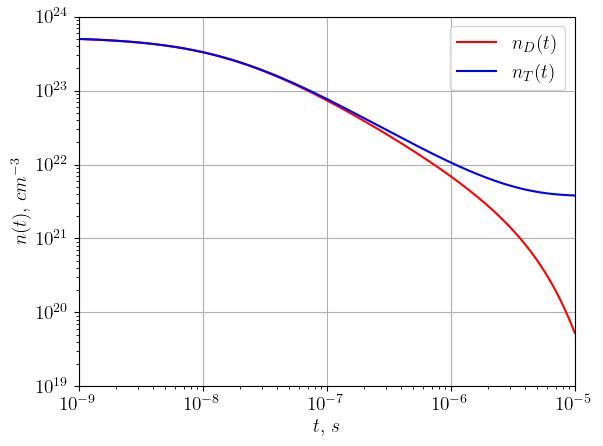

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)
import math
####reactivity parametrization of DT, D3He, DDp, DDn reactions
def react(T,  channel):
    if channel == 'dt':
        Bg  = 34.3827;     mc2 = 1124656;     C1  = 1.17302e-9;  C2  = 1.51361e-2;
        C3  = 7.51886e-2;  C4  = 4.60643e-3;  C5  = 1.35e-2;     C6  = -1.0675e-4;
        C7  = 1.366e-5
    if channel == 'd3he':
        Bg  = 68.7508;     mc2 = 1124572;     C1  = 5.51036e-10; C2  = 6.41918e-3
        C3  = -2.02896e-3; C4  = -1.91080e-5; C5  = 1.35776e-4;  C6  = C7 = 0
    if channel == 'ddp':
        Bg  = 31.397;      mc2 = 937814;      C1  = 5.65718e-12; C2  = 3.41267e-3;
        C3  = 1.99167e-3;  C4  = C6 = C7 = 0; C5  = 1.0506e-5;
    if channel == 'ddn':
        Bg  = 31.397;      mc2 = 937814;      C1  = 5.4336e-12;  C2  = 5.85778e-3;
        C3  = 7.68222e-3;  C4  = C6 = C7 = 0; C5  = -2.964e-6;
        
    teta = T / ( 1 - T*(C2+T*(C4+T*C6))/(1 +T*(C3+T*(C5+T*C7))) )
    ksi = (Bg**2 / teta/4)**(1/3)
    reactivity = C1*teta*np.sqrt(ksi/(mc2*T**3))*np.exp(-3*ksi) 
    return reactivity
###################################################################
def F(s,t):
    react_dd = react(10, 'ddp') + react(10, 'ddn') 
    react_dt = react(10, 'dt')
    nd = -react_dt * s[0] *s[1] - react_dd *s[0] *s[0] / 2
    nt = -react_dt * s[0] *s[1] + react_dd *s[0] *s[0] / 4
    return [nd, nt]
t = np.linspace(1e-9,1e-5, 100000)
s0=[5e+23,5e+23]
s = odeint(F,s0,t)
fig, ax = plt.subplots()
ax.plot(t,s[:,0],'r-', linewidth=1.5)
ax.plot(t,s[:,1],'b-', linewidth=1.5)
plt.xlabel("$t$, $s$")
plt.ylabel("$n(t)$, $cm^{-3}$")
ax.set(ylim=[1e+19,1e+24], yscale ='log')
ax.set(xlim=[1e-9,1e-5], xscale = 'log')
plt.legend(['$n_{D}(t)$','$n_{T}(t)$' ], loc = 'upper right')
plt.grid()
plt.show()